Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


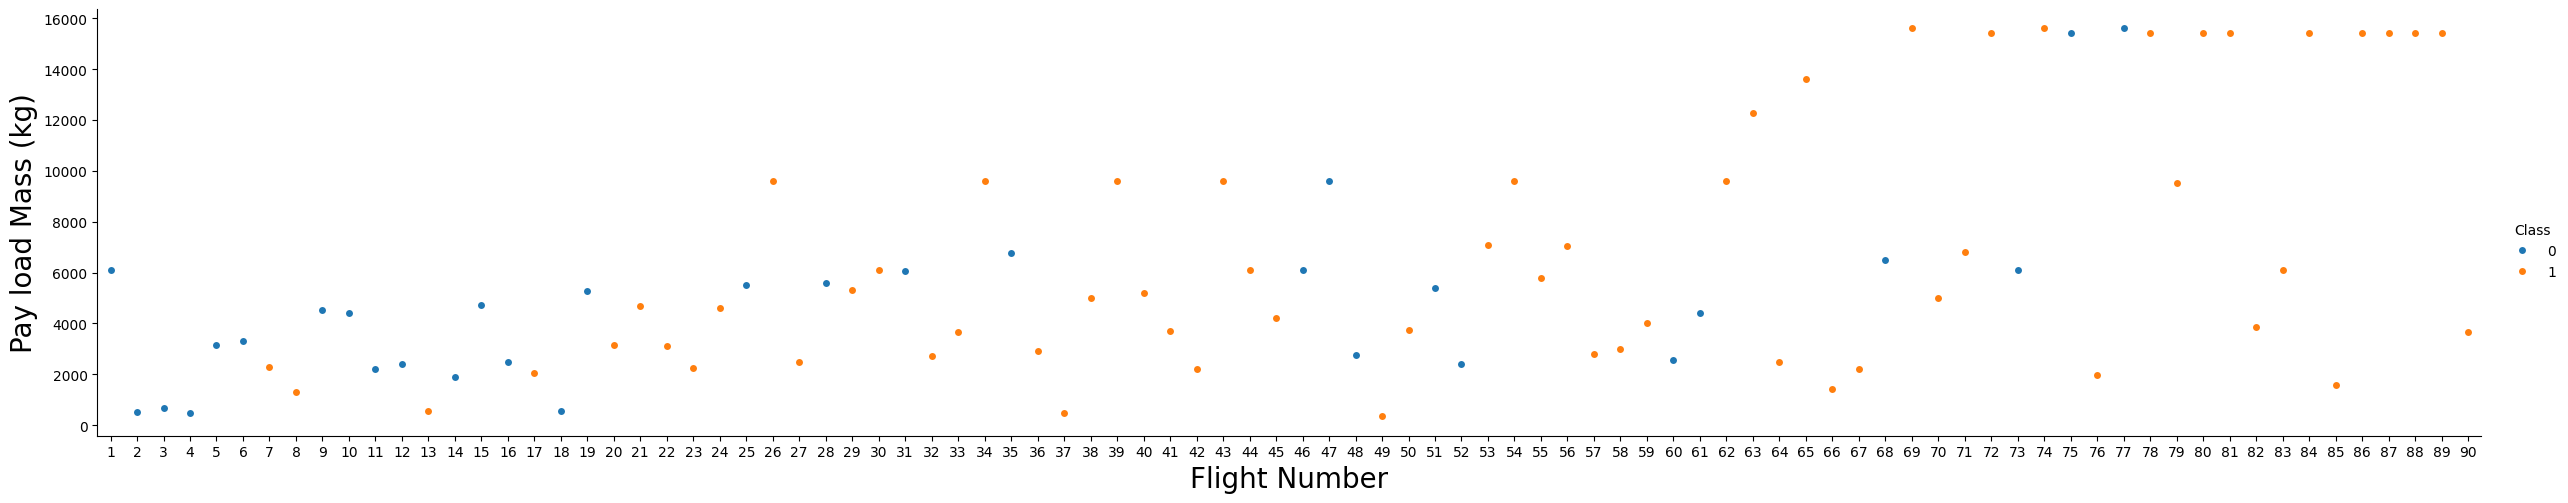

<Figure size 1200x600 with 0 Axes>

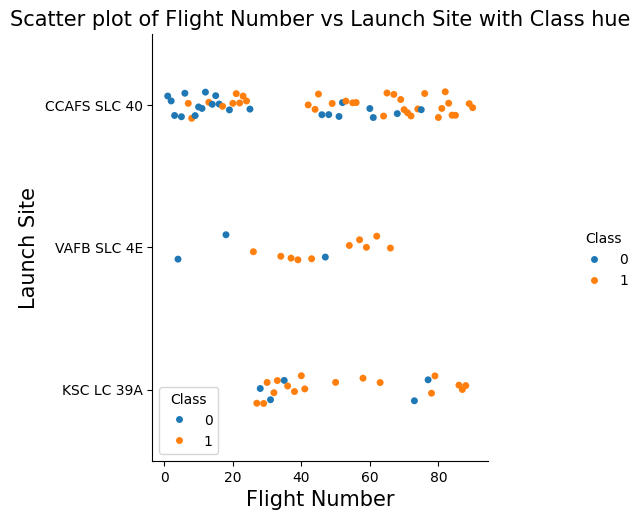

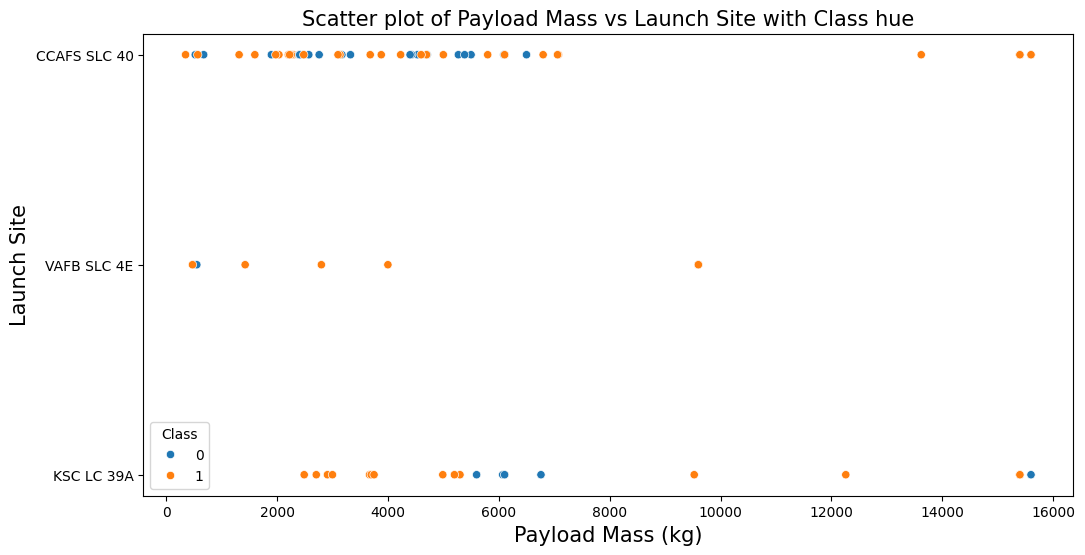

C:\Users\SatSyl\AppData\Local\Temp\ipykernel_22072\4153058159.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orbit", y="Class", data=orbit_success_rate, palette="viridis")


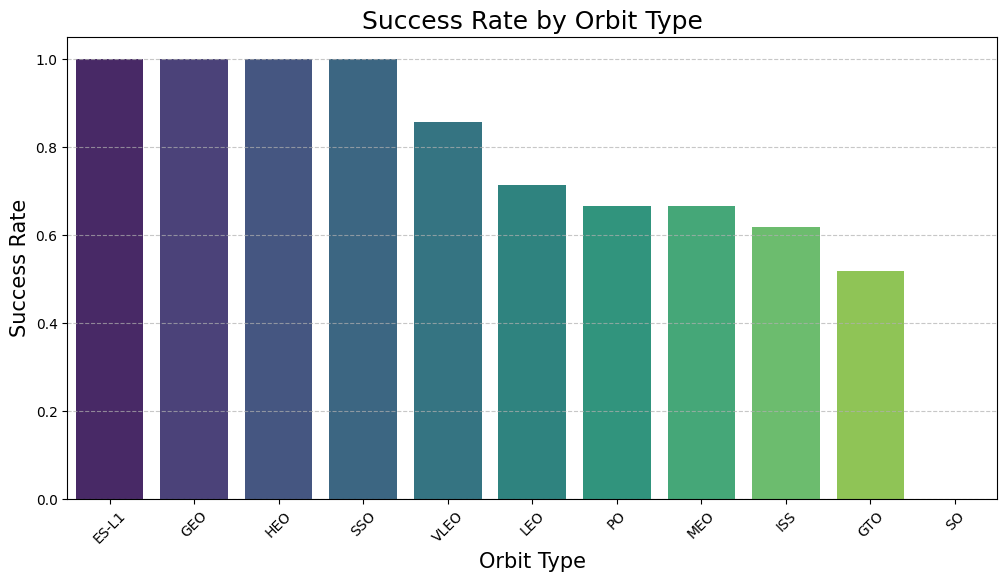

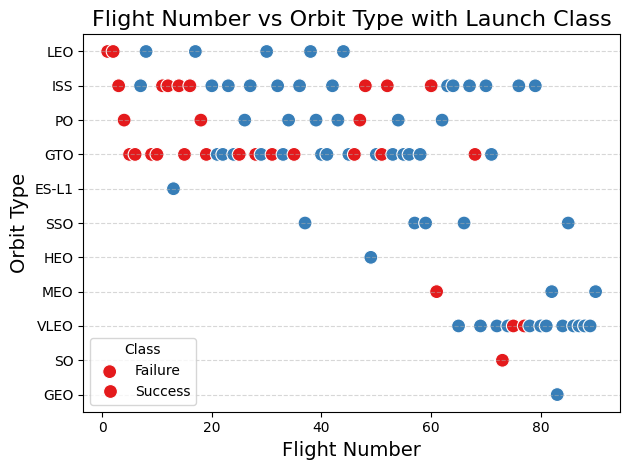

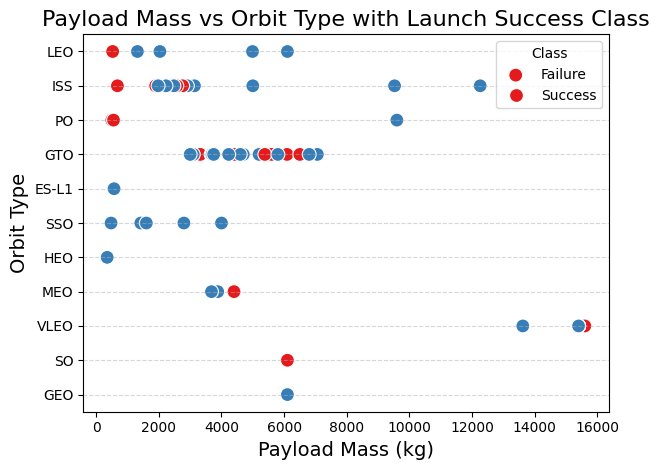

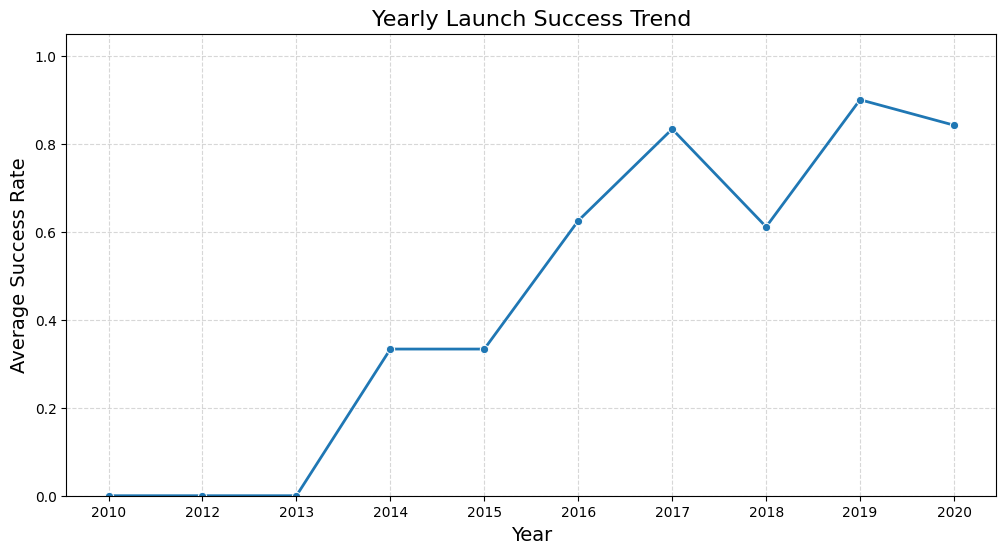

In [2]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#Task 1
# Create scatter plot
plt.figure(figsize=(12,6))
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect = 1)

plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Scatter plot of Flight Number vs Launch Site with Class hue", fontsize=15)
plt.legend(title='Class')
plt.show()

#Task 2
plt.figure(figsize=(12,6))
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Scatter plot of Payload Mass vs Launch Site with Class hue", fontsize=15)
plt.legend(title='Class')
plt.show()

#Task 3
# Step 1: Group by Orbit and calculate mean success rate
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
# Step 2: Sort values for cleaner visualization (optional)
orbit_success_rate = orbit_success_rate.sort_values(by="Class", ascending=False)
# Step 3: Plot the bar chart
plt.figure(figsize=(12,6))
sns.barplot(x="Orbit", y="Class", data=orbit_success_rate, palette="viridis")
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=18)
plt.xticks(rotation=45)
plt.ylim(0, 1.05)  # since success rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#Task 4
sns.scatterplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    palette="Set1",  # Red for failure, blue for success
    s=100  # Size of dots for better visibility
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type with Launch Class", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Class", labels=["Failure", "Success"])
plt.tight_layout()
plt.show()
#Task5
sns.scatterplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    data=df,
    palette="Set1",
    s=100
)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit Type with Launch Success Class", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Class", labels=["Failure", "Success"])
plt.tight_layout()
plt.show()

#Task 6
# Function to extract year from date
year = []
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Apply function
df["Year"] = Extract_year(df["Date"])
# Group by Year and calculate the mean of Class column
yearly_success_rate = df.groupby("Year")["Class"].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Class", data=yearly_success_rate, marker='o', linewidth=2)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Yearly Launch Success Trend", fontsize=16)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#Feature head
features = df[[
    'FlightNumber',     # Sequential ID of flight - reflects experience over time
    'PayloadMass',      # Mass of payload - may affect mission complexity
    'Orbit',            # Type of orbit - categorical feature
    'LaunchSite',       # Launch location - may relate to mission type or constraints
    'Flights',          # Number of previous flights of the booster
    'GridFins',         # Whether grid fins were used (True/False)
    'Reused',           # Whether the rocket was reused
    'Legs',             # Whether the rocket had landing legs
    'LandingPad',       # Specific landing site used
    'Block',            # Version/block of Falcon 9 used
    'ReusedCount',      # Number of times this booster was reused
    'Serial'            # Serial number of the booster core
]]
features.head()
# Task 7 One-hot encode the specified categorical columns
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    prefix=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']  # Optional, helps keep column names clean
)
# Display the first few rows of the resulting DataFrame
features_one_hot.head()

#Task 8
features_one_hot = features_one_hot.astype('float64')
features_one_hot.to_csv('dataset_part_3.csv', index=False)
